In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

In [189]:
df = pd.read_csv('out-tinystories-cluster-spectral/30.csv')
df.head()

,emb0,emb1,emb2,emb3,emb4,emb5,emb6,emb7,label0,label1,label2,label3,label4,label5,label6,label7,token
0,"[0.0006011072546243668, -0.06450191140174866, ...","[0.0006011072546243668, -0.06450191140174866, ...","[0.05809622257947922, -2.568804979324341, 0.52...","[0.6596587300300598, -3.904742479324341, 0.478...","[1.649893045425415, -4.921343803405762, -0.018...","[3.483633279800415, -5.443316459655762, -0.156...","[5.161367416381836, -6.427691459655762, -1.149...","[2.138679027557373, -2.8108208179473877, -0.71...",2,2,0,0,0,0,0,0,Once
1,"[0.0800330638885498, -0.0733233243227005, -0.0...","[0.0800330638885498, -0.0733233243227005, -0.0...","[1.5746619701385498, -2.0153398513793945, 1.10...","[2.81684947013855, -3.4176836013793945, 2.6757...","[3.71528697013855, -3.5358476638793945, 2.2391...","[4.968705177307129, -2.7848711013793945, 3.088...","[7.101517677307129, -3.3830156326293945, 3.358...","[2.550734281539917, -1.4745920896530151, 1.035...",2,2,0,0,0,0,0,0,upon
2,"[0.024861622601747513, -0.014501634985208511, ...","[0.024861622601747513, -0.014501634985208511, ...","[0.7040608525276184, -1.015966534614563, 0.719...","[1.2450764179229736, -1.892919659614563, 1.208...","[1.7831623554229736, -1.5140132904052734, 1.18...","[3.8212482929229736, -1.0208492279052734, 1.17...","[6.3407793045043945, -1.6346187591552734, 1.55...","[3.1453158855438232, -0.9155108332633972, 1.26...",2,2,0,0,0,0,0,0,a
3,"[0.10966695100069046, -0.03712926432490349, 0....","[0.10966695100069046, -0.03712926432490349, 0....","[1.0232411623001099, -2.0177199840545654, -0.0...","[1.6355458498001099, -3.2696731090545654, 0.18...","[2.2859363555908203, -3.8468215465545654, -0.4...","[3.4499988555908203, -4.4112749099731445, -1.3...","[5.08671760559082, -6.3676958084106445, -2.469...","[2.135122776031494, -2.6436424255371094, -0.89...",2,2,0,0,0,0,0,0,time
4,"[0.053735148161649704, -0.08522026240825653, -...","[0.053735148161649704, -0.08522026240825653, -...","[0.8315366506576538, -0.9365386366844177, -0.8...","[1.2558530569076538, -1.2822418212890625, -1.5...","[1.4413999319076538, -1.1259918212890625, -2.3...","[1.0122007131576538, -0.3847808837890625, -3.4...","[1.3354429006576538, -1.6142730712890625, -4.0...","[0.25139617919921875, -0.621404230594635, -1.7...",2,2,0,0,0,0,0,0,there


In [111]:
len(df)

256

In [190]:
all_embs = []
for i in range(1, 8):
    all_embs.extend([eval(emb) for emb in df[f"emb{i}"]])

In [113]:
len(all_embs)

1792

In [191]:
from sklearn.neighbors import kneighbors_graph

n_neighbors = 15

# Create the affinity matrix manually
affinity_matrix = kneighbors_graph(all_embs, n_neighbors=n_neighbors, mode='connectivity', include_self=False).toarray()
affinity_matrix = np.clip(affinity_matrix + affinity_matrix.T, a_min = 0, a_max = 1)

In [192]:
# Compute the Laplacian matrix
degree_matrix = np.diag(np.sum(affinity_matrix, axis=1))  # Degree matrix

In [193]:
laplacian_matrix = degree_matrix - affinity_matrix

# Compute eigenvalues of the Laplacian matrix
eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)

In [194]:
eig = [(eigenvalues[i], eigenvectors[i]) for i in range(len(eigenvalues))]

In [195]:
eig = sorted(eig, key=lambda x: x[0])

In [196]:
n_points = 256
x = {}
y = {}
z = {}

for i in range(1, 8):
    x[i] = []
    y[i] = []
    z[i] = []

    for j in range((i - 1) * n_points, i * n_points):
        x[i].append(eig[0][1][j])
        y[i].append(eig[1][1][j])
        z[i].append(eig[2][1][j])

In [197]:
def linear_combine(x1, y1, z1, x2, y2, z2, alpha):
    return [x1[i] * (1 - alpha) + x2[i] * alpha for i in range(0, len(x1))], [y1[i] * (1 - alpha) + y2[i] * alpha for i in range(0, len(y1))], [z1[i] * (1 - alpha) + z2[i] * alpha for i in range(0, len(z1))]

## Old GIF Code

In [ ]:
frame_count = 0

for i in range(1, 7):
    for alpha in np.arange(0, 1, 0.05):
        xp, yp, zp = linear_combine(x[i], y[i], z[i], x[i + 1], y[i + 1], z[i + 1], alpha)
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        # Scatter plot
        ax.set_xlim(-0.2, 0.2)
        ax.set_ylim(-0.2, 0.2)
        ax.set_zlim(-0.2, 0.2)
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")
        ax.scatter(xp, yp, zp, c='b', marker='o')
        ax.set_title(str(np.round(i - 1 + alpha, 2)))
        plt.savefig(f"gif_plots_3d/frame{frame_count}.png")
        plt.close(fig)
        frame_count += 1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Scatter plot
ax.set_xlim(-0.2, 0.2)
ax.set_ylim(-0.2, 0.2)
ax.set_zlim(-0.2, 0.2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.scatter(x[7], y[7], z[7], c='b', marker='o')
ax.set_title("6.00 (END)")
plt.savefig(f"gif_plots_3d/frame{frame_count}.png")
plt.close(fig)

In [ ]:
import imageio

# List of image filenames
filenames = [f"gif_plots_3d/frame{i}.png" for i in range(121)]  # frame0.png to frame60.png

# Create the GIF
gif_filename = 'animation_3d.gif'
with imageio.get_writer(gif_filename, mode='I', duration=0.1) as writer:  # 0.1s per frame
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

print(f"GIF saved as {gif_filename}")


/var/folders/sn/m1jt_qvx06db6gq859hkndh00000gn/T/ipykernel_10473/3722191524.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF saved as animation_3d.gif


## New GIF Code (All Tokens)

In [198]:
# ... existing code ...

import plotly.graph_objects as go
import numpy as np

# Function for linear interpolation
def linear_combine(x1, y1, z1, x2, y2, z2, alpha):
    return (
        [x1[i] * (1 - alpha) + x2[i] * alpha for i in range(len(x1))],
        [y1[i] * (1 - alpha) + y2[i] * alpha for i in range(len(y1))],
        [z1[i] * (1 - alpha) + z2[i] * alpha for i in range(len(z1))]
    )

# Create frames for the animation using linear interpolation
frames = []
for i in range(1, 7):
    for alpha in np.arange(0, 1, 0.01):  # Increase step size to reduce frames
        xp, yp, zp = linear_combine(x[i], y[i], z[i], x[i + 1], y[i + 1], z[i + 1], alpha)
        frames.append(go.Frame(
            data=[go.Scatter3d(
                x=xp,
                y=yp,
                z=zp,
                mode='markers+text',
                marker=dict(
                    size=5,
                    color='blue',
                    opacity=0.8
                ),
                text=df["token"],
                textposition='top center',
                textfont=dict(
                    size=12
                )
            )],
            name=f'Layer {(i+alpha):.2f}',
            layout=go.Layout(
                title=dict(text=f"Layer {(i+alpha):.2f}")  # Dynamic title with frame number
            )
        ))

# Create the initial figure
fig = go.Figure(
    data=[go.Scatter3d(
        x=x[1],
        y=y[1],
        z=z[1],
        mode='markers+text',
        marker=dict(
            size=5,
            color='blue',
            opacity=0.8
        ),
        text=df["token"],
        textposition='top center',
        textfont=dict(
            size=15
        )
    )],
    layout=go.Layout(
        scene=dict(
            xaxis=dict(nticks=10, range=[-0.1, 0.1]),  # Default range
            yaxis=dict(nticks=10, range=[-0.1, 0.1]),  # Default range
            zaxis=dict(nticks=10, range=[-0.1, 0.1]),  # Default range
            aspectmode='cube'
        ),
        margin=dict(r=20, b=10, l=10, t=50),
        scene_camera=dict(
            eye=dict(x=1, y=1, z=1)
        ),
        width=1200,
        height=800,
        updatemenus=[dict(
            type="buttons",
            showactive=False,
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None, {"frame": {"duration": 10, "redraw": True},  # Minimal frame duration
                                       "transition": {"duration": 0},  # No transition delay
                                       "fromcurrent": True, "mode": "immediate"}]),
                     dict(label="Pause",
                          method="animate",
                          args=[[None], {"frame": {"duration": 0, "redraw": True},
                                         "mode": "immediate"}])]
        )]
    ),
    frames=frames
)
# Save the interactive plot to an HTML file
fig.write_html("3d_animation.html")

# ... existing code ...

## Querying Certain Tokens

In [199]:
# Assuming df is your DataFrame and it has a column named "token"
# Count the occurrences of each token
token_counts = df["token"].value_counts()

# Get the most common words
most_common_tokens = token_counts.head(10)  # Change 10 to however many you want to see

# Display the most common tokens
print(most_common_tokens)

token
 the       19
,          12
 to         9
.           8
\n          8
 puppy      8
 and        8
 was        7
 family     6
 a          5
Name: count, dtype: int64


In [200]:
token_to_query = ' family'

In [201]:
# ... existing code ...

import plotly.graph_objects as go
import numpy as np

# Function for linear interpolation
def linear_combine(x1, y1, z1, x2, y2, z2, alpha):
    return (
        [x1[i] * (1 - alpha) + x2[i] * alpha for i in range(len(x1))],
        [y1[i] * (1 - alpha) + y2[i] * alpha for i in range(len(y1))],
        [z1[i] * (1 - alpha) + z2[i] * alpha for i in range(len(z1))]
    )

# Create frames for the animation using linear interpolation
frames = []
for i in range(1, 7):
    for alpha in np.arange(0, 1, 0.05):  # Increase step size to reduce frames
        xp, yp, zp = linear_combine(x[i], y[i], z[i], x[i + 1], y[i + 1], z[i + 1], alpha)
        frames.append(go.Frame(
            data=[go.Scatter3d(
                x=xp,
                y=yp,
                z=zp,
                mode='markers+text',
                marker=dict(
                    size=5,
                    color=['rgba(255, 165, 0, 1)' if token == token_to_query else 'rgba(0, 0, 255, 0.1)' for token in df["token"]]
                ),
                text=[token_to_query if token == token_to_query else '' for token in df["token"]],  # Label only 'a'
                textposition='top center',
                textfont=dict(
                    size=12
                )
            )],
            name=f'Layer {(i+alpha):.2f}',
            layout=go.Layout(
                title=dict(text=f"Layer {(i+alpha):.2f}")  # Dynamic title with frame number
            )
        ))

# Create the initial figure
fig = go.Figure(
    data=[go.Scatter3d(
        x=x[1],
        y=y[1],
        z=z[1],
        mode='markers+text',
        marker=dict(
            size=5,
            color=['rgba(255, 165, 0, 1)' if token == token_to_query else 'rgba(0, 0, 255, 0.1)' for token in df["token"]]
        ),
        text=[token_to_query if token == token_to_query else '' for token in df["token"]],  # Label only 'a'
        textposition='top center',
        textfont=dict(
            size=15
        )
    )],
    layout=go.Layout(
        scene=dict(
            xaxis=dict(nticks=10, range=[-0.1, 0.1]),  # Default range
            yaxis=dict(nticks=10, range=[-0.1, 0.1]),  # Default range
            zaxis=dict(nticks=10, range=[-0.1, 0.1]),  # Default range
            aspectmode='cube'
        ),
        margin=dict(r=20, b=10, l=10, t=50),
        scene_camera=dict(
            eye=dict(x=1, y=1, z=1)
        ),
        width=1200,
        height=800,
        updatemenus=[dict(
            type="buttons",
            showactive=False,
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None, {"frame": {"duration": 30, "redraw": True},  # Minimal frame duration
                                       "transition": {"duration": 0},  # No transition delay
                                       "fromcurrent": True, "mode": "immediate"}]),
                     dict(label="Pause",
                          method="animate",
                          args=[[None], {"frame": {"duration": 0, "redraw": True},
                                         "mode": "immediate"}])]
        )]
    ),
    frames=frames
)
# Save the interactive plot to an HTML file
fig.write_html("3d_animation.html")

# ... existing code ...

In [203]:
# ... existing code ...

import plotly.graph_objects as go
import numpy as np

# Function for linear interpolation
def linear_combine(x1, y1, z1, x2, y2, z2, alpha):
    return (
        [x1[i] * (1 - alpha) + x2[i] * alpha for i in range(len(x1))],
        [y1[i] * (1 - alpha) + y2[i] * alpha for i in range(len(y1))],
        [z1[i] * (1 - alpha) + z2[i] * alpha for i in range(len(z1))]
    )

# Create frames for each token and store them in a dictionary
tokens_to_frames = {}
for token in df["token"].unique():
    frames = []
    for i in range(1, 7):
        for alpha in np.arange(0, 1, 0.05):  # Adjust step size as needed
            xp, yp, zp = linear_combine(x[i], y[i], z[i], x[i + 1], y[i + 1], z[i + 1], alpha)
            frames.append(go.Frame(
                data=[go.Scatter3d(
                    x=xp,
                    y=yp,
                    z=zp,
                    mode='markers+text',
                    marker=dict(
                        size=5,
                        color=['rgba(255, 165, 0, 1)' if token == token else 'rgba(0, 0, 255, 0.1)' for token in df["token"]]
                    ),
                    text=[token if token == token else '' for token in df["token"]],
                    textposition='top center',
                    textfont=dict(size=12)
                )],
                name=f'Layer {token}',  # Use token name for frame name
                layout=go.Layout(
                    title=dict(text=f"Layer {token}")  # Dynamic title with token name
                )
            ))
    tokens_to_frames[token] = frames  # Store frames in the dictionary

# Create the initial figure with the first token
initial_token = df["token"].value_counts().idxmax()  # Start with the most common token
fig = go.Figure(
    data=[go.Scatter3d(
        x=x[1],
        y=y[1],
        z=z[1],
        mode='markers+text',
        marker=dict(
            size=5,
            color=['rgba(255, 165, 0, 1)' if token == initial_token else 'rgba(0, 0, 255, 0.1)' for token in df["token"]]
        ),
        text=[initial_token if token == initial_token else '' for token in df["token"]],
        textposition='top center',
        textfont=dict(size=15)
    )],
    layout=go.Layout(
        scene=dict(
            xaxis=dict(nticks=10, range=[-0.1, 0.1]),
            yaxis=dict(nticks=10, range=[-0.1, 0.1]),
            zaxis=dict(nticks=10, range=[-0.1, 0.1]),
            aspectmode='cube'
        ),
        margin=dict(r=20, b=10, l=10, t=50),
        scene_camera=dict(eye=dict(x=1, y=1, z=1)),
        width=1200,
        height=800,
        updatemenus=[
            dict(
                type="buttons",
                showactive=False,
                buttons=[
                    dict(label="Play",
                         method="animate",
                         args=[None, {"frame": {"duration": 30, "redraw": True},
                                       "transition": {"duration": 0},
                                       "fromcurrent": True, "mode": "immediate"}]),
                    dict(label="Pause",
                         method="animate",
                         args=[[None], {"frame": {"duration": 0, "redraw": True},
                                        "mode": "immediate"}])
                ]
            )
        ]
    ),
    frames=tokens_to_frames[initial_token]  # Initialize frames with the most common token
)

# Generate HTML with a sidebar for token selection
html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Token Animation</title>
    <style>
        body {
            display: flex;
        }
        #sidebar {
            width: 200px;
            padding: 10px;
            background: #f0f0f0;
            overflow-y: auto;  /* Allow scrolling if there are many tokens */
        }
        #plot {
            flex-grow: 1;
        }
        .token-item {
            cursor: pointer;
            padding: 5px;
            border-radius: 3px;
        }
        .token-item:hover {
            background-color: #d0d0d0;  /* Highlight on hover */
        }
    </style>
</head>
<body>
    <div id="sidebar">
        <h3>Select a Token</h3>
        <ul>
            """ + ''.join(f'<li class="token-item" onclick="updateToken(\'{token}\')">{token}</li>' for token in df["token"].unique()) + """
        </ul>
    </div>
    <div id="plot">""" + fig.to_html(full_html=False, include_plotlyjs='cdn') + """</div>

    <script>
        var currentToken = '""" + initial_token + """';  // Store the current token

        function updateToken(selectedToken) {
            currentToken = selectedToken;  // Update the current token
            var plotDiv = document.getElementById('plot');
            var figure = """ + fig.to_json() + """;  // Get the current figure
            var frames = tokens_to_frames[selectedToken];  // Get frames for the selected token
            figure.frames = frames;  // Update frames
            Plotly.react(plotDiv, figure.data, figure.layout, {});
        }
    </script>
</body>
</html>
"""

# Save the HTML content to a file
with open("token_animation.html", "w") as f:
    f.write(html_content)

# ... existing code ...

## Distance Metric

Investigating if tokens travel different distances based on semantic meanings.

In [137]:
total_distances = []
for i in range(len(df)):
    d = sum(abs(x[j+1][i]-x[j][i]) for j in range(1, 7)) + sum(abs(y[j+1][i]-y[j][i]) for j in range(1, 7)) + sum(abs(z[j+1][i]-z[j][i]) for j in range(1, 7))
    total_distances.append((d, df["token"][i]))

In [138]:
total_distances.sort()

In [140]:
for index, item in enumerate(total_distances, start=1):
    print(f"{index}. {item}")

1. (np.float64(0.08927170052590776), ' will')
2. (np.float64(0.10983808026196104), ' Jane')
3. (np.float64(0.11133952232234887), "'s")
4. (np.float64(0.11683273782658071), ' get')
5. (np.float64(0.11709268649477515), ' very')
6. (np.float64(0.12632578065065428), ' and')
7. (np.float64(0.12643161719836454), ' possession')
8. (np.float64(0.12838646891440086), ' the')
9. (np.float64(0.13233221967312292), ' joy')
10. (np.float64(0.13651820749146676), ' a')
11. (np.float64(0.13738965184096977), ' was')
12. (np.float64(0.14902971324022293), ' outside')
13. (np.float64(0.14989176017607225), ' with')
14. (np.float64(0.15181625123364673), ' very')
15. (np.float64(0.15322602628415782), ' upon')
16. (np.float64(0.1539330129061473), ' safe')
17. (np.float64(0.1569834405482007), ' as')
18. (np.float64(0.16216320773361395), ' wealthy')
19. (np.float64(0.16857797159448973), ' to')
20. (np.float64(0.17370793564530582), ' eyes')
21. (np.float64(0.17376962421859415), ' they')
22. (np.float64(0.177896072

### Length of Word vs. Distance Traveled

Not much relationship between word complexity (length as proxy) and taxicab distance.

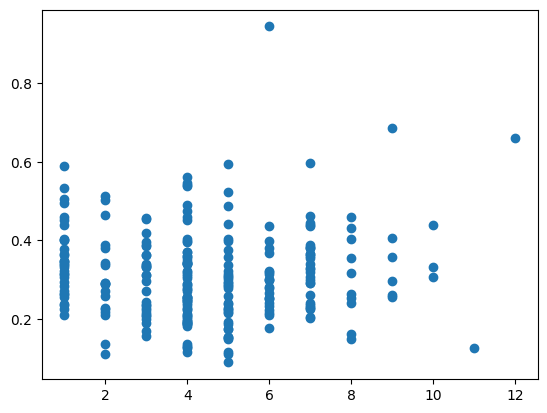

In [142]:
token_lengths = [len(thing[1]) for thing in total_distances]
distances = [thing[0] for thing in total_distances]

plt.scatter(token_lengths, distances)
plt.show()

### Complexity of Word vs. Distance Traveled

Not much relationship here either.

In [144]:
import tiktoken

In [146]:
encoding = tiktoken.get_encoding("gpt2")
token_id = encoding.encode(" the")
token_id

[262]

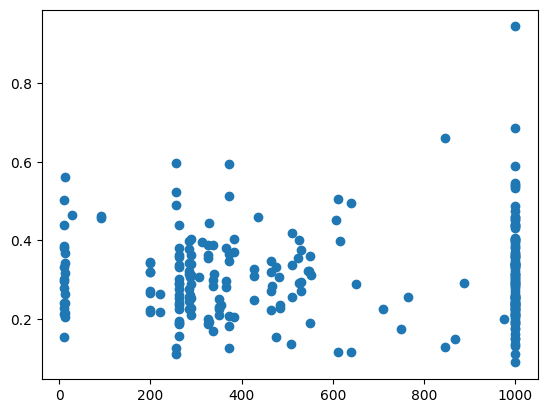

In [165]:
token_ids = [min(encoding.encode(token)[0], 1000) for token in df["token"]]
plt.scatter(token_ids, distances)
plt.show()

## Token Selection Experimentation